In [96]:
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
## from sklearn.ensemble import RandomForestRegressor

In [ ]:
## Defininf three different datasets
Y = "target"

dataset = pd.DataFrame(datasets.load_digits(as_frame=True).frame)
#dataset = pd.DataFrame(datasets.load_wine(as_frame=True).frame)
#dataset = pd.DataFrame(datasets.load_breast_cancer(as_frame=True).frame)

display(dataset.sample(5))
#dataset.describe()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
1289,0.0,0.0,2.0,12.0,16.0,10.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,1.0,8.0,8.0,11.0,16.0,6.0,2
195,0.0,0.0,0.0,6.0,14.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,8.0,14.0,13.0,5.0,0.0,6
791,0.0,1.0,8.0,16.0,16.0,16.0,10.0,0.0,0.0,8.0,...,0.0,0.0,1.0,13.0,12.0,0.0,0.0,0.0,0.0,5
1483,0.0,0.0,0.0,6.0,14.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,10.0,13.0,0.0,0.0,0.0,4
666,0.0,0.0,5.0,15.0,14.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,12.0,2.0,0.0,0.0,0


In [106]:
# Training a Random Forest Classifier with OOB score and Boostrap Aggregation

RFModel = RandomForestClassifier(
    n_estimators=100,           ## 100 trees
    max_depth=7,                ## each tree is, at max, 5 levels deep
    min_samples_split=2,        ## each node must have at least 2 samples to split
    min_samples_leaf=1,         ## each leaf must have at least 1 sample
    max_features='sqrt',        ## each tree uses sqrt(n_features) features
    oob_score=True,
    bootstrap=True,
    random_state=42
)

# Splitting the dataset into training and testing sets (We will still use the OOB score, but also the model-agnostic metrics)
train_set, test_set= train_test_split(dataset, test_size=0.35, random_state=42)
test_set_x, test_set_y = test_set.drop(columns=Y), test_set[Y]

## Best part, fitting!
RFModel.fit(train_set.drop(columns=Y), train_set[Y])

## Preparing some metrics
accuracy = accuracy_score(test_set_y, RFModel.predict(test_set_x))
cm = confusion_matrix(test_set_y, RFModel.predict(test_set_x))
report = classification_report(test_set_y, RFModel.predict(test_set_x), output_dict=True)

,0,1,2,3,4,5,6,7,8,9,accuracy,macro avg,weighted avg
precision,0.982456,0.923077,0.982456,1.000000,0.970149,0.986111,0.983051,0.941176,0.912281,0.942857,0.961844,0.962361,0.962761
recall,0.982456,0.983607,0.982456,0.919355,0.984848,0.934211,0.983051,0.984615,0.945455,0.929577,0.961844,0.962963,0.961844
f1-score,0.982456,0.952381,0.982456,0.957983,0.977444,0.959459,0.983051,0.962406,0.928571,0.936170,0.961844,0.962238,0.961870
support,57.000000,61.000000,57.000000,62.000000,66.000000,76.000000,59.000000,65.000000,55.000000,71.000000,0.961844,629.000000,629.000000


Out-of-Bag Score: 95.12%
Acurracy: 0.9618


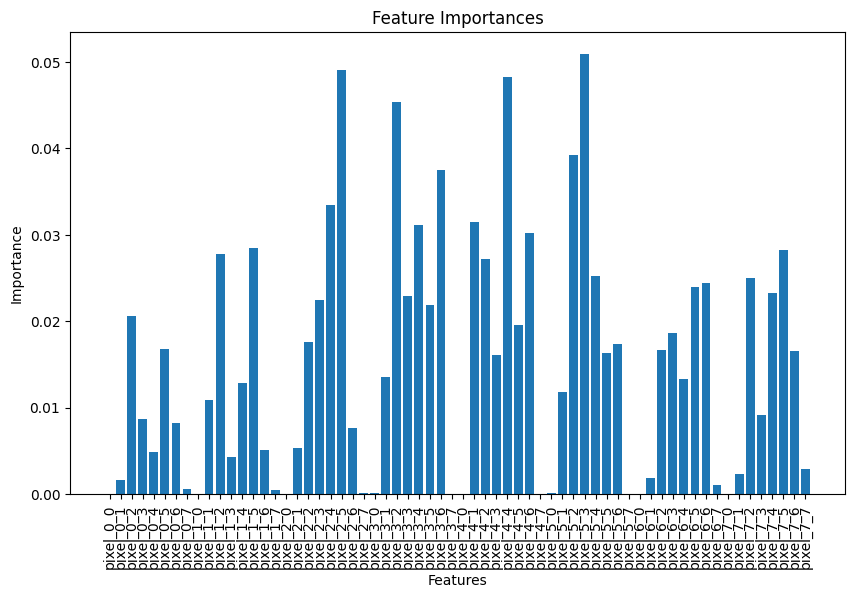

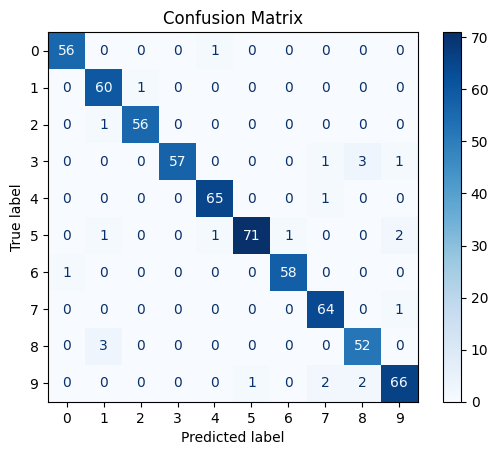

In [108]:
## Plotting the feature importances and scores
 
plt.figure(figsize=(10, 6))
plt.bar(dataset.columns[:-1], RFModel.feature_importances_)
plt.xticks(rotation=90)
plt.title("Feature Importances")
plt.xlabel("Features")
plt.ylabel("Importance")

matrix = ConfusionMatrixDisplay(cm, display_labels=RFModel.classes_).plot(cmap='Blues').ax_.set_title("Confusion Matrix")
report = pd.DataFrame(report).transpose()
display(report)
print(f"Out-of-Bag Score: {round(RFModel.oob_score_, 4)*100}%")
print(f"Acurracy: {round(accuracy, 4)}")
plt.show()
